# MD Tahseen Equbal (AI-ML-21)
## Phase 1 - Project Fedex Data EDA and Model Building 

## Import Required Library

In [3]:
import pandas as pd
import numpy as np
import sweetviz
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\91771\anaconda3\envs\tf\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\91771\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loadinng Data Set 

In [4]:
df = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\Machine Learning\Phase 1 Project\Fedex Project\fedex.csv")

## Exploratory Data Analysis

In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [6]:
df.shape

(3604175, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [8]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [9]:
col_int = ['Month', 'DayofMonth', 'DayOfWeek','Planned_Shipment_Time', 'Planned_Delivery_Time','Carrier_Num','Distance']
col_float = ['Actual_Shipment_Time','Planned_TimeofTravel', 'Shipment_Delay', 'Delivery_Status']

In [10]:
for i in col_int:
    print(df[i].unique())

[1 2 3 4 5 6]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1]
[4 5 6 7 1 2 3]
[1955  735  620 ...   34  245  425]
[2225 1000  750 ...  206  319  419]
[ 335 3231  448 ... 6809 6846 5913]
[ 810  515  688 ... 1866  855 1413]


In [11]:
for i in col_int:
    df[i] = df[i].astype(np.int32)

In [12]:
for i in col_int:
    print(df[i].dtype)

int32
int32
int32
int32
int32
int32
int32


In [13]:
for i in col_float:
    print(df[i].unique())

[2003.  754.  628. ...  339.  343.  342.]
[ 1.500e+02  1.450e+02  9.000e+01  1.150e+02  2.500e+02  9.500e+01
  1.350e+02  5.500e+01  5.000e+01  2.400e+02  7.000e+01  6.500e+01
  1.950e+02  1.900e+02  3.500e+02  1.650e+02  1.700e+02  1.800e+02
  1.850e+02  1.300e+02  8.000e+01  1.000e+02  1.200e+02  7.500e+01
  1.050e+02  1.250e+02  8.500e+01  2.750e+02  1.600e+02  1.550e+02
  2.850e+02  2.050e+02  2.100e+02  1.100e+02  6.000e+01  2.650e+02
  2.600e+02  2.700e+02  2.300e+02  1.750e+02  2.150e+02  2.000e+02
  2.900e+02  1.400e+02  2.450e+02  2.250e+02  2.350e+02  2.200e+02
  2.550e+02  3.150e+02  3.000e+02  4.500e+01  2.800e+02  3.650e+02
  3.550e+02  3.350e+02  3.450e+02  3.400e+02  2.950e+02  3.700e+02
  3.050e+02  3.100e+02  3.600e+02  3.250e+02  3.300e+02  3.200e+02
  7.100e+01  1.720e+02  7.900e+01  1.190e+02  1.220e+02  9.200e+01
  1.980e+02  1.070e+02  8.400e+01  1.730e+02  7.700e+01  1.780e+02
  8.300e+01  1.140e+02  2.140e+02  6.700e+01  5.400e+01  1.280e+02
  6.600e+01  1.340e+

In [14]:
for i in col_float:
    df[i] = df[i].astype(np.float32)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int32  
 2   DayofMonth             int32  
 3   DayOfWeek              int32  
 4   Actual_Shipment_Time   float32
 5   Planned_Shipment_Time  int32  
 6   Planned_Delivery_Time  int32  
 7   Carrier_Name           object 
 8   Carrier_Num            int32  
 9   Planned_TimeofTravel   float32
 10  Shipment_Delay         float32
 11  Source                 object 
 12  Destination            object 
 13  Distance               int32  
 14  Delivery_Status        float32
dtypes: float32(4), int32(7), int64(1), object(3)
memory usage: 261.2+ MB


### Missing Value

In [16]:
df.isna().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [17]:
df.drop('Year',axis=1,inplace=True)

In [18]:
imp = SimpleImputer(strategy='most_frequent')

In [19]:
df['Delivery_Status'] = imp.fit_transform(df[['Delivery_Status']])

In [20]:
continuous = [
    'Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time', 
    'Planned_TimeofTravel', 'Shipment_Delay', 'Distance'
]
nominal = [
    'Carrier_Name', 'Carrier_Num', 'Source', 'Destination'
]
ordinal = ['Month', 'DayofMonth', 'DayOfWeek']

In [21]:
order = [[1,2,3,4,5,6],
        [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
        [1,2,3,4,5,6,7]]

In [22]:
cont_transform = Pipeline([("Mean Imputation", SimpleImputer(strategy='mean')),
         ('Standard Scalar', StandardScaler())])
nomi_transform = Pipeline([("Mode Imputation", SimpleImputer(strategy='most_frequent')),
         ('ohe', OneHotEncoder(handle_unknown='ignore',drop='first'))])
ordi_transform = Pipeline([("Mode Imputation", SimpleImputer(strategy='most_frequent')),
         ('ohe', OrdinalEncoder(categories=order))])

In [23]:
preprocess = ColumnTransformer([('Continuos Transform', cont_transform, continuous),
                  ('Nominal Transform',nomi_transform,nominal),
                  ('Ordinal Transform',ordi_transform,ordinal)])
preprocess

ColumnTransformer(transformers=[('Continuos Transform',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Standard Scalar',
                                                  StandardScaler())]),
                                 ['Actual_Shipment_Time',
                                  'Planned_Shipment_Time',
                                  'Planned_Delivery_Time',
                                  'Planned_TimeofTravel', 'Shipment_Delay',
                                  'Distance']),
                                ('Nominal Transform',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most...
                                                                handle_unknown='ignore'))]),
                                 ['Carrier_Name', 'Carrier_Num', 'Source',
                                  'Destination']),
                                ('Ordinal Transform',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19,
                                                                              20,
                                                                              21,
                                                                              22,
                                                                              23,
                                                                              24,
                                                                              25,
                                                                              26,
                                                             

In [24]:
model_lr = Pipeline([('Data Preprocessing',preprocess),
         ('Algorithm',LogisticRegression())])
model_lr

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuos Transform',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scalar',
                                                                   StandardScaler())]),
                                                  ['Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel',
                                                   'Shipment_Delay',
                                                   'Distance']),
                                                 ('Nominal Transform',
                                                  Pipeline(steps=[('Mod...
                                                   'Carrier_Num', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Transform',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8,
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
    

In [25]:
X = df.drop('Delivery_Status',axis=1)
y = df['Delivery_Status']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

### Logistic Regression 

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

C:\Users\91771\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
print(f'Accuracy_LR: {accuracy_lr:.4f}')
print(f'Precision_LR: {precision_lr:.4f}')
print(f'Recall_LR: {recall_lr:.4f}')
print(f'F1-Score_LR: {f1_lr:.4f}')

Accuracy_LR: 1.0000
Precision_LR: 1.0000
Recall_LR: 1.0000
F1-Score_LR: 1.0000


### Decision Tree 

In [31]:
model_dt = Pipeline([('Data Preprocessing',preprocess),
         ('Algorithm',DecisionTreeClassifier())])
model_dt

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuos Transform',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scalar',
                                                                   StandardScaler())]),
                                                  ['Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel',
                                                   'Shipment_Delay',
                                                   'Distance']),
                                                 ('Nominal Transform',
                                                  Pipeline(steps=[('Mod...
                                                   'Carrier_Num', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Transform',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8,
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
    

In [34]:
model_dt.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')

C:\Users\91771\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [35]:
print(f'Accuracy_DT: {accuracy_dt:.4f}')
print(f'Precision_DT: {precision_dt:.4f}')
print(f'Recall_DT: {recall_dt:.4f}')
print(f'F1-Score_DT: {f1_dt:.4f}')

Accuracy_DT: 1.0000
Precision_DT: 1.0000
Recall_DT: 1.0000
F1-Score_DT: 1.0000


### Model Comparission 

In [39]:
metrics = {
    'Accuracy': [accuracy_lr, accuracy_dt],
    'Precision': [precision_lr, precision_dt],
    'Recall': [recall_lr, recall_dt],
    'F1-Score': [f1_lr, f1_dt]
}
df_metrics = pd.DataFrame(metrics, index=['Logistic Regression', 'Decision Tree'])

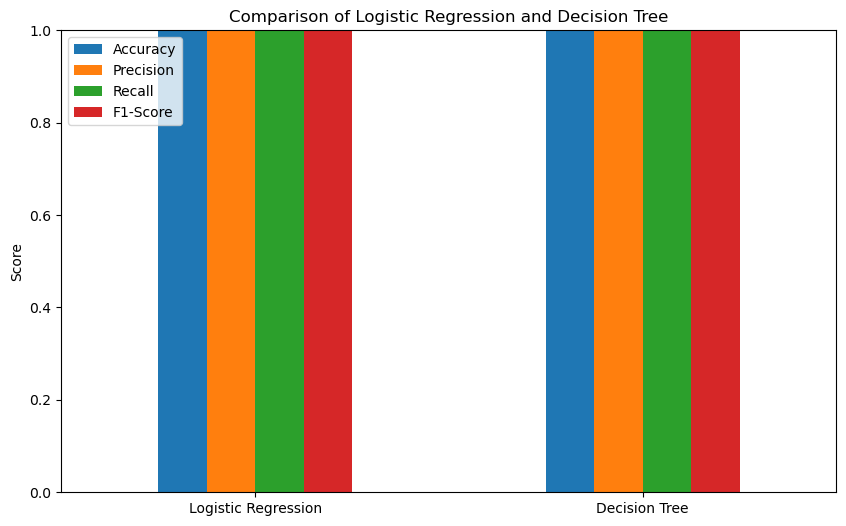

In [41]:
import matplotlib.pyplot as plt
# Plot the metrics for comparison
df_metrics.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Comparison of Logistic Regression and Decision Tree')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)

# Display the legend and plot
plt.legend(loc='upper left')
plt.show()

**Insight Final Conculusion**
**Consistent Performance**: Both models (Logistic Regression and Decision Tree) exhibit almost identical performance across all metrics (Accuracy, Precision, Recall, F1-Score).

**High Scores Across Metrics**: Each metric (Accuracy, Precision, Recall, and F1-Score) appears to be close to 1.0 for both models, indicating that both classifiers are performing very well on the given dataset.

**No Clear Winner**: Since the metrics are nearly identical, there's no clear winner between Logistic Regression and Decision Tree in this particular comparison. Both models are equally effective according to the graph.

**Model Selection**: Given that both models perform similarly, the choice between Logistic Regression and Decision Tree may depend on other factors such as interpretability, model complexity, or computational efficiency.

**Balanced Data**: The high scores across all metrics suggest that the dataset is likely well-balanced, with no significant class imbalance issues.

## Deployement

In [63]:
Month = int(input("Enter the month (1-6): "))
DayofMonth = int(input("Enter the day of the month (1-31): "))
DayOfWeek = int(input("Enter the day of the week (1 for Monday, 7 for Sunday): "))
Actual_Shipment_Time = float(input("Enter the actual shipment time : "))
Planned_Shipment_Time = int(input("Enter the planned shipment time : "))
Planned_Delivery_Time = int(input("Enter the planned delivery time : "))
Carrier_Name = input("Enter the carrier name: ")
Carrier_Num = int(input("Enter the carrier number: "))
Planned_TimeofTravel = float(input("Enter the planned time of travel in hours: "))
Shipment_Delay = float(input("Enter the shipment delay in hours: "))
Source = input("Enter the source location: ")
Destination = input("Enter the destination location: ")
Distance = int(input("Enter the distance in kilometers: "))

input_data = pd.DataFrame([{
    'Month': Month,
    'DayofMonth': DayofMonth,
    'DayOfWeek': DayOfWeek,
    'Actual_Shipment_Time': Actual_Shipment_Time,
    'Planned_Shipment_Time': Planned_Shipment_Time,
    'Planned_Delivery_Time': Planned_Delivery_Time,
    'Carrier_Name': Carrier_Name,
    'Carrier_Num': Carrier_Num,
    'Planned_TimeofTravel': Planned_TimeofTravel,
    'Shipment_Delay': Shipment_Delay,
    'Source': Source,
    'Destination': Destination,
    'Distance': Distance
}])
Delivery_Status = model_lr.predict(input_data)[0]

print(f"The predicted delivery status is: {Delivery_Status}")

Enter the month (1-6):  1
Enter the day of the month (1-31):  3
Enter the day of the week (1 for Monday, 7 for Sunday):  4
Enter the actual shipment time :  628.0
Enter the planned shipment time :  620
Enter the planned delivery time :  750
Enter the carrier name:  WN
Enter the carrier number:  448
Enter the planned time of travel in hours:  90.0
Enter the shipment delay in hours:  8.0
Enter the source location:  IND
Enter the destination location:  BWI
Enter the distance in kilometers:  515
The predicted delivery status is: 0.0


In [64]:
df.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


## Pikling the file

In [36]:
import pickle
from sklearn.ensemble import RandomForestClassifier

In [37]:
pickle.dump(model_lr,open("Fedex.pkl","wb"))

In [38]:
model = pickle.load(open("Fedex.pkl","rb"))

In [77]:
model

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuos Transform',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scalar',
                                                                   StandardScaler())]),
                                                  ['Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel',
                                                   'Shipment_Delay',
                                                   'Distance']),
                                                 ('Nominal Transform',
                                                  Pipeline(steps=[('Mod...
                                                   'Carrier_Num', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Transform',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8,
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
    